In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [18]:
url="https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/mushrooms.csv"
df = pd.read_csv(url)

label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

df.drop('veil-type', axis=1, inplace=True)
X = df.drop('class', axis=1)
y = df['class']

cat_col = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

t_encoder = TargetEncoder(cols=cat_col)
X_train = t_encoder.fit_transform(X_train, y_train)
X_test = t_encoder.transform(X_test)

D_tree_model = DecisionTreeClassifier()
D_tree_model.fit(X_train, y_train)

y_predict = D_tree_model.predict(X_test)

print("confusion_matrix : \n", confusion_matrix(y_test, y_predict))
print("\n")
print("classification_report : \n", classification_report(y_test, y_predict))




confusion_matrix : 
 [[842   0]
 [  0 783]]


classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



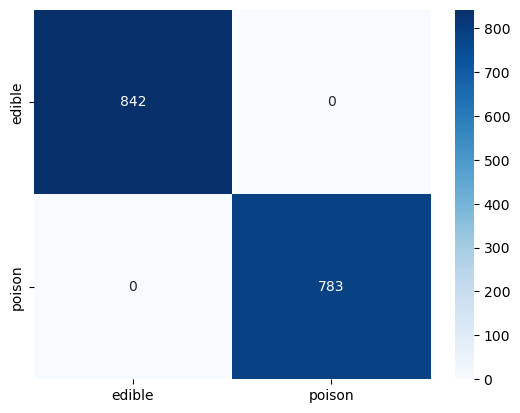

In [25]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', cmap='Blues', xticklabels=['edible', 'poison'], yticklabels=['edible', 'poison'])
plt.show()

In [24]:
cols = X.columns
classes = ['edible', 'poisonous']

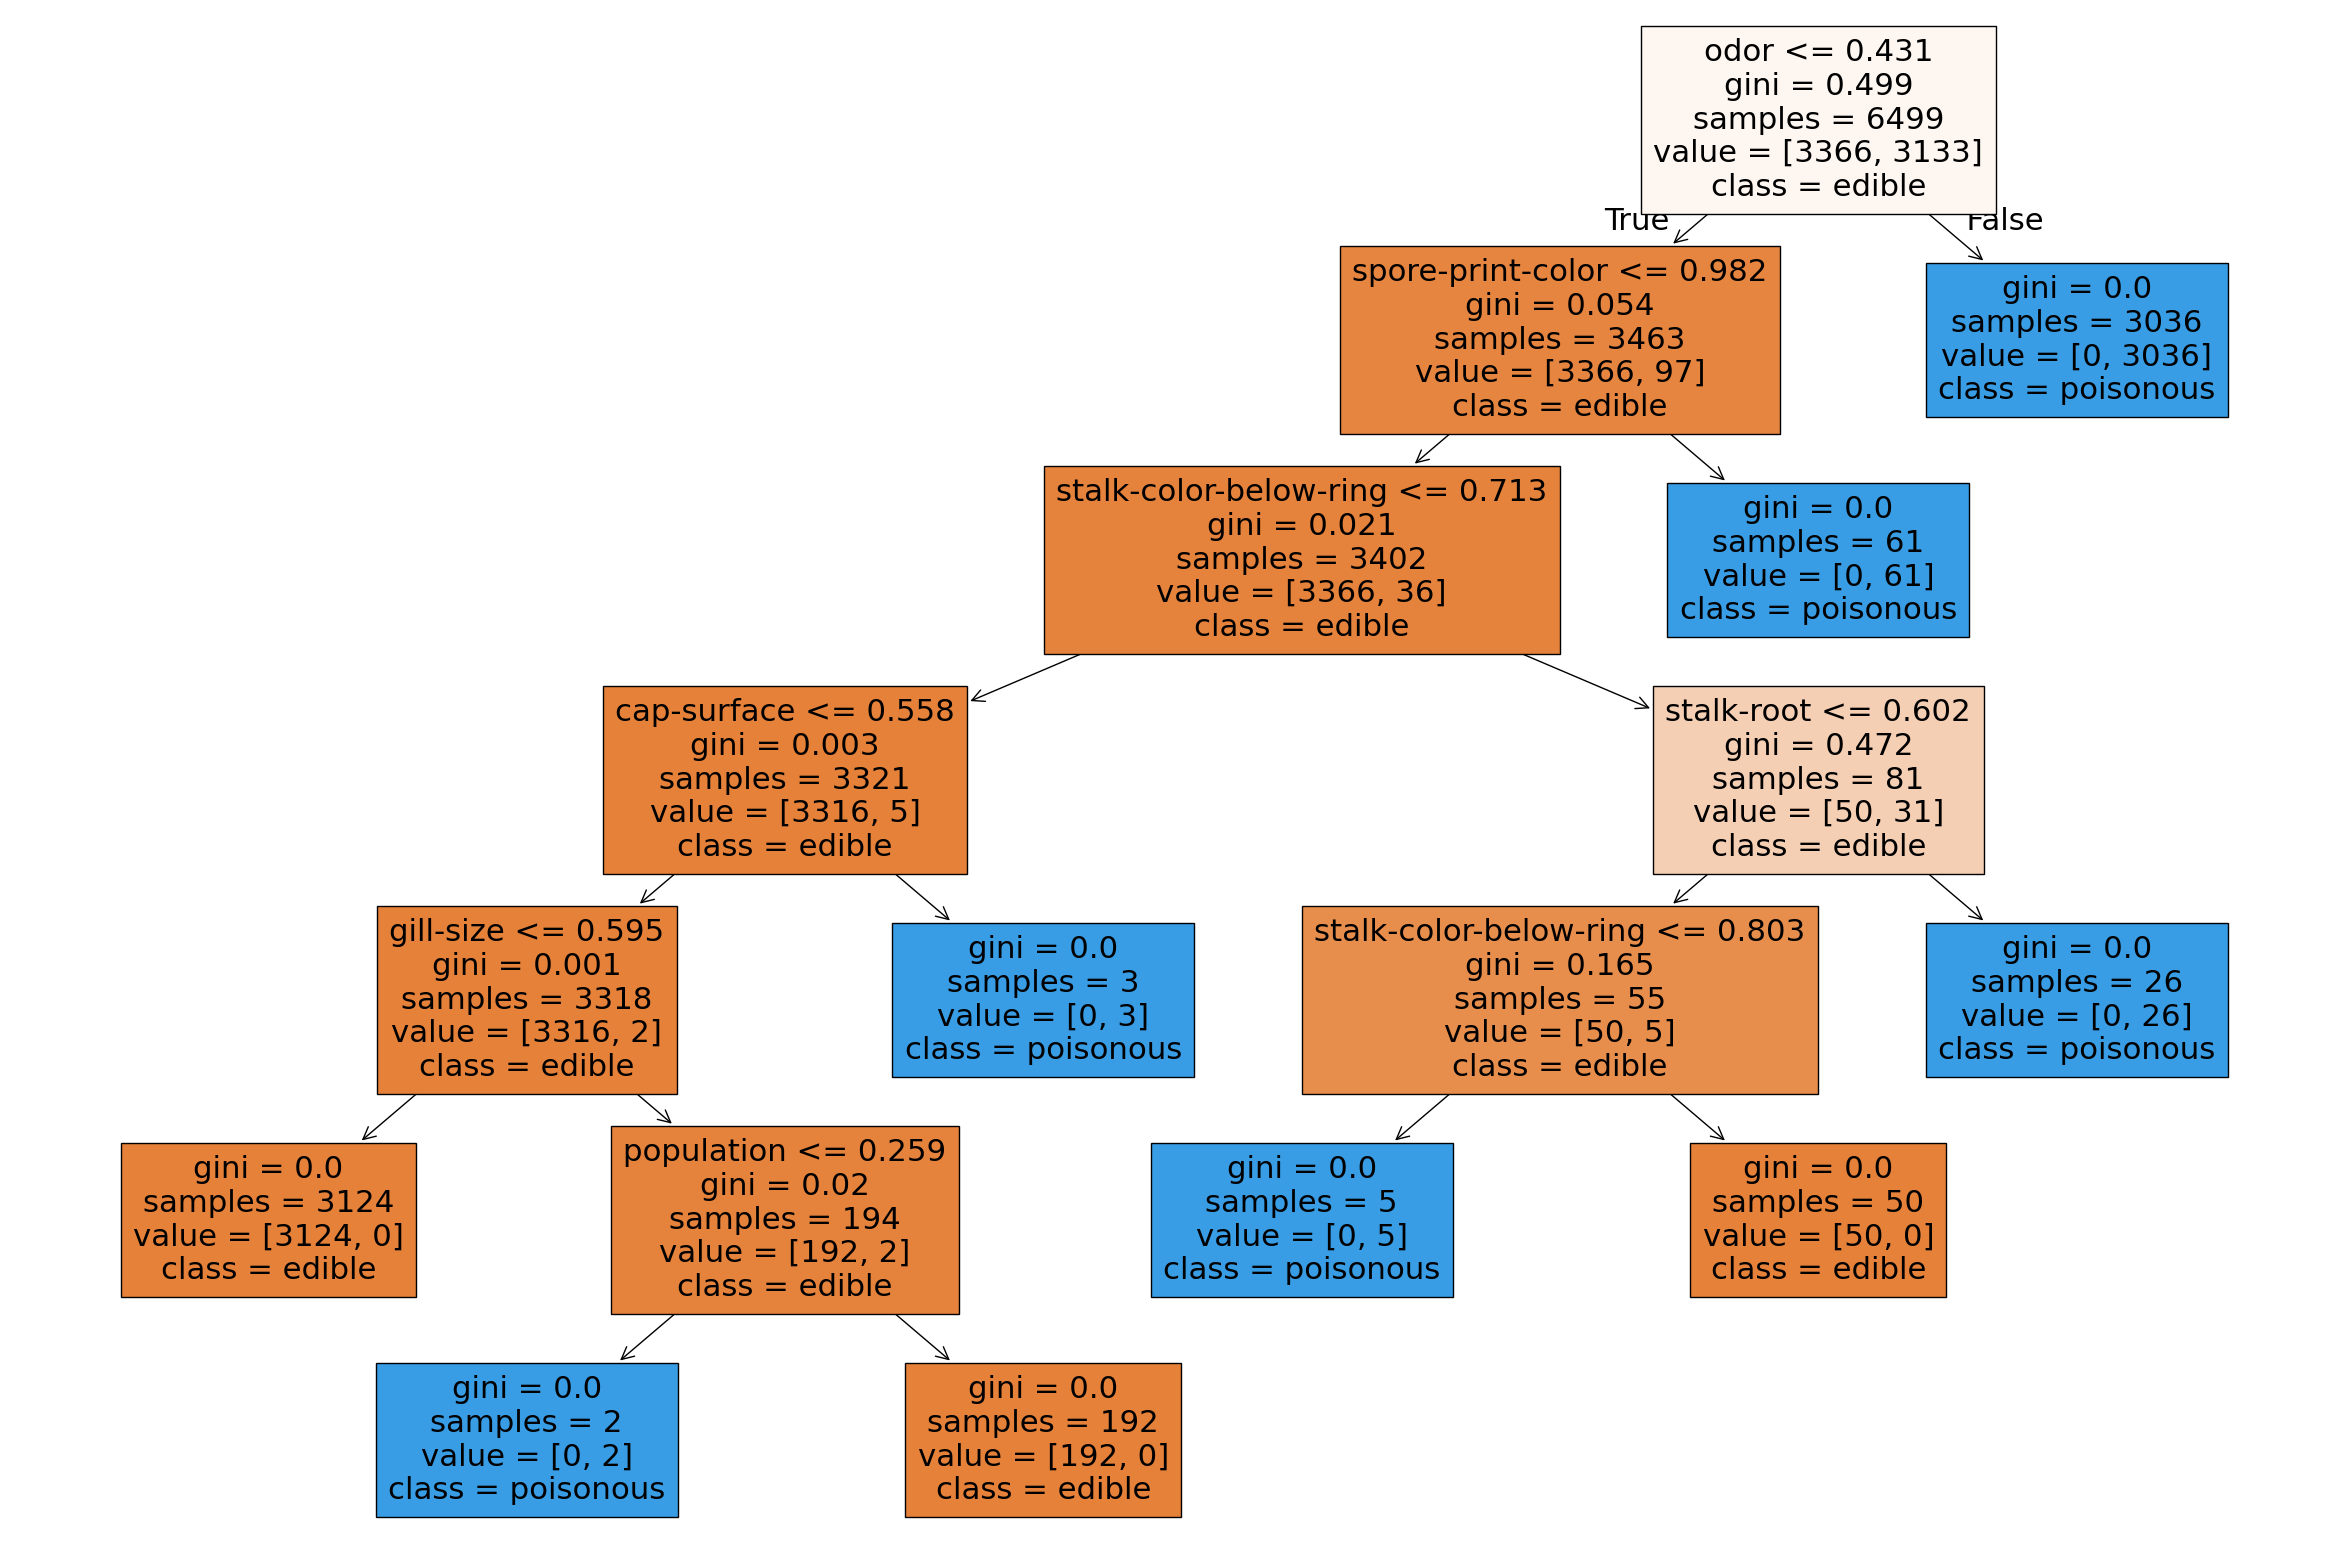

In [21]:
plt.figure(figsize=(30,20))
tree.plot_tree(D_tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

In [22]:
rf_model = RandomForestClassifier(n_estimators=30)
rf_model.fit(X_train, y_train)
y_prediction = rf_model.predict(X_test)
print(classification_report(y_test, y_prediction))
print("\n")
print("DecisionTreeAccuracy : ", metrics.accuracy_score(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



DecisionTreeAccuracy :  1.0
